# Bound comparison

In [8]:
bounds = range(8)

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts

plt.close('all')

def read_data(path):
    df = pd.read_csv(path)
    return df

def moments(dfs):
    concat_df = pd.concat(dfs, axis=1)
    mean_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).mean()
    std_df = pd.concat(dfs, axis=1).groupby(by=concat_df.columns, axis=1).std()
    return mean_df, std_df

def compare(means, stds, conf, ylim=None):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for mean, std in zip(means, stds):
        n_runs = len(mean)
        ax.plot(mean.index, mean)
        interval = sts.t.interval(conf, n_runs-1,loc=mean,scale=std/np.sqrt(n_runs))
        ax.fill_between(mean.index, interval[0], interval[1], alpha=0.3)
    if ylim: ax.set_ylim(ylim)
    ax.legend(bounds)
    return fig

def plot_data(path, key='VanillaAvgRet'):
    df = pd.read_csv(path)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    mean = df[key]
    ax.plot(mean.index, mean)
    return fig

## Bound legend
* 0: Vanilla weights, Return Var, Classic ESS
* 1: Vanilla weights, Return Var, Renyi ESS
* 2: Vanilla weights, Return Max, Classic ESS
* 3: Vanilla weights, Return Max, Renyi ESS
* 4: Normalized weights, Return Var, Classic ESS
* 5: Normalized weights, Return Var, Renyi ESS
* 6: Normalized weights, Return Max, Classic ESS
* 7: Normalized weights, Return Max, Renyi ESS

## LQG

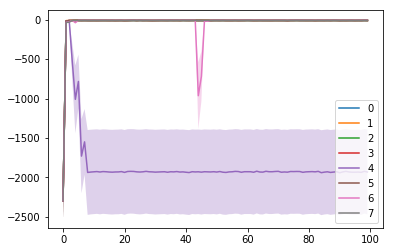

In [10]:
path = '../results/poisnpe/shift_fix/bound_%d/lqg/seed_%d/progress.csv'
#bounds = [5,7]
seeds = [107, 583, 850, 730, 808]
conf = 0.95

mean_dfs, std_dfs = [], []
for bound in bounds:
    mean_df, std_df = moments([read_data(path % (bound, seed)) for seed in seeds])
    mean_dfs.append(mean_df['AvgRet'])
    std_dfs.append(std_df['AvgRet'])
compare(mean_dfs, std_dfs, conf)

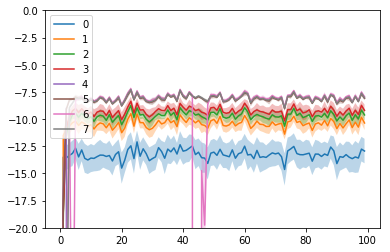

In [11]:
compare(mean_dfs, std_dfs, conf, ylim=[-20,0])

## LQG (no shift)

/home/matteo/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1903: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


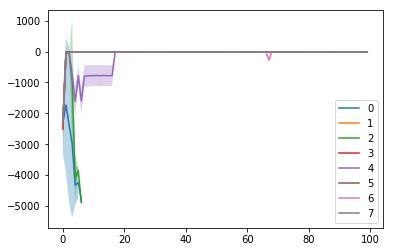

In [12]:
path = '../results/poisnpe/noshift_fix/bound_%d/lqg/seed_%d/progress.csv'
seeds = [107, 583, 850, 730, 808]
conf = 0.95

mean_dfs, std_dfs = [], []
for bound in bounds:
    mean_df, std_df = moments([read_data(path % (bound, seed)) for seed in seeds])
    mean_dfs.append(mean_df['AvgRet'])
    std_dfs.append(std_df['AvgRet'])
compare(mean_dfs, std_dfs, conf)

/home/matteo/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1903: RuntimeWarning: invalid value encountered in greater
  cond0 = self._argcheck(*args) & (scale > 0) & (loc == loc)


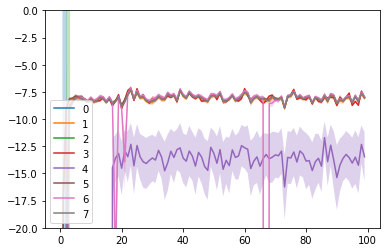

In [13]:
compare(mean_dfs, std_dfs, conf, ylim=[-20,0])

## Cartpole

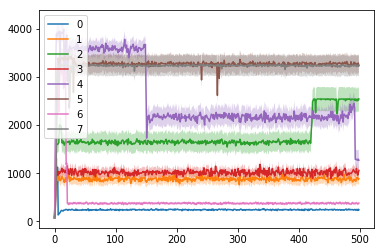

In [69]:
path = '../results/poisnpe/bound_%d/rllab_cartpole/seed_%d/progress.csv'

seeds = [107, 583, 850, 730, 808]
conf = 0.95
mean_dfs, std_dfs = [], []
for bound in bounds:
    mean_df, std_df = moments([read_data(path % (bound, seed)) for seed in seeds])
    mean_dfs.append(mean_df['VanillaAvgRet'])
    std_dfs.append(std_df['VanillaAvgRet'])
compare(mean_dfs, std_dfs, conf)

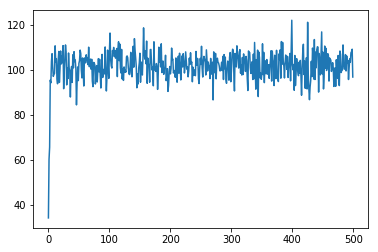

In [70]:
plot_data(path % (7, 730))

## Cartpole no-shift

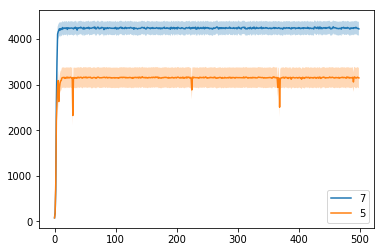

In [72]:
bounds = [7, 5]
path = '../results/poisnpe/no_shift/bound_%d/rllab_cartpole/seed_%d/progress.csv'

seeds = [107, 583, 850, 730, 808]
conf = 0.95
mean_dfs, std_dfs = [], []
for bound in bounds:
    mean_df, std_df = moments([read_data(path % (bound, seed)) for seed in seeds])
    mean_dfs.append(mean_df['VanillaAvgRet'])
    std_dfs.append(std_df['VanillaAvgRet'])
compare(mean_dfs, std_dfs, conf)

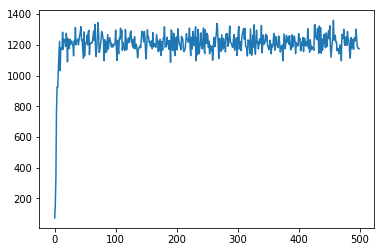

In [73]:
plot_data(path % (7, 850))

## Cartpole: comparison with TRPO

In [81]:
new_seeds = [73, 78, 343, 423, 902]